# 🧠 Brain Tumor Shape Detection using OpenCV
This notebook demonstrates a basic approach to detect the shape of a brain tumor in an MRI image using thresholding and contour detection with OpenCV.

In [1]:
# 📦 Install required packages (if not already installed)
!pip install opencv-python numpy matplotlib

## 🔍 Step 1: Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 🖼️ Step 2: Load and Preprocess the Image
**Note:** Replace `'brain_mri.jpg'` with the path to your own MRI scan image.

In [6]:
# Load the image
img = cv2.imread('brain_mri.jpg')  # Replace with your image path
if img is None:
    raise FileNotFoundError("Image not found. Make sure 'brain_mri.jpg' exists in the working directory.")

# Resize image
img = cv2.resize(img, (256, 256))

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Thresholding
_, thresh = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY_INV)

## ✏️ Step 3: Find Contours and Highlight Tumor Shape

In [7]:
# Find contours
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy original image for drawing
tumor_detected = img.copy()
cv2.drawContours(tumor_detected, contours, -1, (0, 255, 0), 2)

# Draw bounding box around the largest contour
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    cv2.rectangle(tumor_detected, (x, y), (x + w, y + h), (255, 0, 0), 2)

## 📊 Step 4: Visualize Results

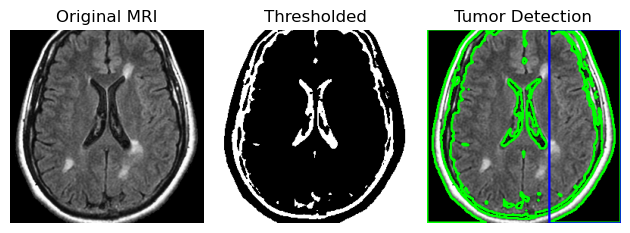

In [8]:
titles = ['Original MRI', 'Thresholded', 'Tumor Detection']
images = [img, thresh, tumor_detected]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB) if i != 1 else images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()